In [3]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import urllib.request
import zipfile
from os import remove
from sklearn.feature_selection import VarianceThreshold

# Ejercicio 1

Este cuaderno plantea una serie de ejercicios relacionados con un conjunto de datos de compras por internet de ropa.

  1. Crear un diccionario y su diccionario inverso para convertir cada uno de los siguientes atributos a un entero y viceversa.

    * Género ['H', 'M', 'U'] , indica si es una prenda para hombre, mujer o unisex.

    * Material ['Algodón', 'Lana', 'Pana', 'Cuero', 'Microfibra', 'Poliester'] , indica el tejido mayoritario de la prenda.

    * Talla ['-XS', 'XS', 'S', 'M', 'L', 'XL', '+XL']

    * Estilo ['Deporte', 'Fiesta', 'Joven', 'Trabajo', 'Etiqueta']

  2. Crear una tabla aleatoria de 10 ejemplos donde cada ejemplo viene representado por estos 4 atributos.

  3. Convertir la tabla en otra numérica llamada  utilizando los diccionarios.
  4. Responde a las siguientes preguntas:

    * ¿Cuál es el vector x_1 ?
    * ¿Cuál es el vector  x^(1)?
    * ¿Cuál es el valor x_3^(2)?

  5. Pasar el atributo Genero a una representación one-hot con ceros y unos, no con valores lógicos (True, False)



In [4]:
# --- 1. Definición de los atributos categóricos ---
print("--- 1. Definición de Atributos ---")
genero_cat = ['H', 'M', 'U']
material_cat = ['Algodón', 'Lana', 'Pana', 'Cuero', 'Microfibra', 'Poliester']
talla_cat = ['-XS', 'XS', 'S', 'M', 'L', 'XL', '+XL']
estilo_cat = ['Deporte', 'Fiesta', 'Joven', 'Trabajo', 'Etiqueta']

print(f"Género: {genero_cat}")
print(f"Material: {material_cat}")
print(f"Talla: {talla_cat}")
print(f"Estilo: {estilo_cat}\n")

# --- 2. Creación de diccionarios de mapeo (Categórico -> Entero y viceversa) ---
print("--- 2. Creación de Diccionarios de Mapeo ---")

# Función auxiliar para crear ambos diccionarios con bucles multi-línea
def crear_diccionarios(categorias):
  """Crea un diccionario de categoría a entero y su inverso."""
  cat_to_int = {} # Inicializa diccionario vacío
  for i, categoria in enumerate(categorias):
    cat_to_int[categoria] = i

  int_to_cat = {} # Inicializa diccionario vacío
  for categoria, i in cat_to_int.items():
    int_to_cat[i] = categoria
  return cat_to_int, int_to_cat

# Crear diccionarios para cada atributo
genero_to_int, int_to_genero = crear_diccionarios(genero_cat)
material_to_int, int_to_material = crear_diccionarios(material_cat)
talla_to_int, int_to_talla = crear_diccionarios(talla_cat)
estilo_to_int, int_to_estilo = crear_diccionarios(estilo_cat)

# Guardar los diccionarios de mapeo categórico a entero en una lista para facilitar la conversión
mapeos_a_entero = [genero_to_int, material_to_int, talla_to_int, estilo_to_int]

# Mostrar los diccionarios (opcional, para entender)
print("Diccionario Género (Cat -> Int):", genero_to_int)
print("Diccionario Género (Int -> Cat):", int_to_genero)
print("Diccionario Material (Cat -> Int):", material_to_int)
print("Diccionario Talla (Cat -> Int):", talla_to_int)
print("Diccionario Estilo (Cat -> Int):", estilo_to_int)
print("\n")

# --- 3. Creación de tabla aleatoria categórica (10 ejemplos) ---
print("--- 3. Creación de Tabla Categórica Aleatoria (10 ejemplos) ---")
num_ejemplos = 10
datos_categoricos = []

# Bucle for multi-línea para generar los ejemplos
for _ in range(num_ejemplos):
  ejemplo = [
      random.choice(genero_cat),
      random.choice(material_cat),
      random.choice(talla_cat),
      random.choice(estilo_cat)
  ]
  datos_categoricos.append(ejemplo)

# Usar pandas para una visualización más clara
columnas_cat = ['Genero', 'Material', 'Talla', 'Estilo']
tabla_categorica_df = pd.DataFrame(datos_categoricos, columns=columnas_cat)

print("Tabla Categórica:")
print(tabla_categorica_df)
print("\n")

# --- 4. Conversión a tabla numérica usando los diccionarios ---
print("--- 4. Conversión a Tabla Numérica ---")
datos_numericos = []

# Bucle for externo multi-línea (recorre filas)
for fila_categorica in datos_categoricos:
  fila_numerica = []
  # Bucle for interno multi-línea (recorre columnas/atributos de una fila)
  # Usamos enumerate para obtener el índice (j) y el valor categórico
  for j, valor_cat in enumerate(fila_categorica):
    # mapeos_a_entero[j] selecciona el diccionario correcto (genero, material, etc.)
    diccionario_actual = mapeos_a_entero[j]
    valor_num = diccionario_actual[valor_cat]
    fila_numerica.append(valor_num)
  datos_numericos.append(fila_numerica)

# Convertir a NumPy array para facilitar operaciones y acceso
tabla_numerica_np = np.array(datos_numericos)

# También se puede mostrar como DataFrame para claridad
columnas_num = ['Genero_Num', 'Material_Num', 'Talla_Num', 'Estilo_Num']
tabla_numerica_df = pd.DataFrame(tabla_numerica_np, columns=columnas_num)

print("Tabla Numérica (como NumPy array):")
print(tabla_numerica_np)
print("\nTabla Numérica (como DataFrame):")
print(tabla_numerica_df)
print("\n")

# --- 5. Responder a las preguntas sobre vectores y elementos ---
print("--- 5. Identificación de Vectores y Elementos ---")

# Nota: En álgebra lineal y machine learning, la notación puede variar.
# Asumiremos la convención común:
# x_j : representa el vector de la j-ésima característica (columna).
# x^(i): representa el vector del i-ésimo ejemplo (fila).
# x_j^(i): representa el valor de la j-ésima característica para el i-ésimo ejemplo.
# ¡IMPORTANTE! Python usa indexación basada en 0 (el primer elemento es el índice 0).
# Si la notación del examen usa indexación basada en 1, hay que ajustar.

# ¿Cuál es el vector x_1? (Primer vector de característica / primera columna)
# Corresponde a la columna de índice 0 en el array NumPy
vector_x_1 = tabla_numerica_np[:, 0]
print(f"Vector x_1 (Primera característica/columna, índice 0): {vector_x_1}")

# ¿Cuál es el vector x^(1)? (Primer ejemplo / primera fila)
# Corresponde a la fila de índice 0 en el array NumPy
vector_x_pow_1 = tabla_numerica_np[0, :] # o simplemente tabla_numerica_np[0]
print(f"Vector x^(1) (Primer ejemplo/fila, índice 0): {vector_x_pow_1}")

# ¿Cuál es el valor x_3^(2)? (Valor de la tercera característica para el segundo ejemplo)
# Característica 3 -> índice 2 en Python (columnas)
# Ejemplo 2 -> índice 1 en Python (filas)
valor_x_3_pow_2 = tabla_numerica_np[1, 2]
print(f"Valor x_3^(2) (Elemento en fila índice 1, columna índice 2): {valor_x_3_pow_2}")
# Para verificar, mostramos la fila 1 (segundo ejemplo) y la columna 2 (tercera característica)
print(f"  -> Corresponde al valor de '{columnas_num[2]}' en el segundo ejemplo (fila índice 1): {tabla_numerica_df.iloc[1]}")
print("\n")

# --- 6. Pasar el atributo Genero a una representación one-hot ---
print("--- 6. Representación One-Hot para 'Genero' ---")

# Número de categorías de Género
num_categorias_genero = len(genero_cat) # = 3

# Columna numérica de Género (vector_x_1 que ya calculamos)
genero_numerico = tabla_numerica_np[:, 0]

# Crear matriz de ceros: filas = num_ejemplos, columnas = num_categorias_genero
genero_one_hot = np.zeros((num_ejemplos, num_categorias_genero), dtype=int)

# Rellenar la matriz one-hot
# Bucle for multi-línea para asignar los '1'
# Para cada ejemplo (fila i), poner un 1 en la columna correspondiente a su valor numérico de género
for i in range(num_ejemplos):
  indice_categoria = genero_numerico[i] # Obtiene el valor numérico (0, 1 o 2)
  genero_one_hot[i, indice_categoria] = 1 # Pone un 1 en la columna correcta

print("Representación One-Hot para Género:")

# Crear los nombres de columna para el DataFrame de one-hot con bucle multi-línea
one_hot_column_names = []
for cat in genero_cat:
  one_hot_column_names.append(f"Genero_{cat}")

# Mostrarlo como DataFrame para mejor legibilidad, junto a la columna original
one_hot_df = pd.DataFrame(genero_one_hot, columns=one_hot_column_names)
resultado_one_hot = pd.concat([tabla_categorica_df[['Genero']], tabla_numerica_df[['Genero_Num']], one_hot_df], axis=1)
print(resultado_one_hot)

--- 1. Definición de Atributos ---
Género: ['H', 'M', 'U']
Material: ['Algodón', 'Lana', 'Pana', 'Cuero', 'Microfibra', 'Poliester']
Talla: ['-XS', 'XS', 'S', 'M', 'L', 'XL', '+XL']
Estilo: ['Deporte', 'Fiesta', 'Joven', 'Trabajo', 'Etiqueta']

--- 2. Creación de Diccionarios de Mapeo ---
Diccionario Género (Cat -> Int): {'H': 0, 'M': 1, 'U': 2}
Diccionario Género (Int -> Cat): {0: 'H', 1: 'M', 2: 'U'}
Diccionario Material (Cat -> Int): {'Algodón': 0, 'Lana': 1, 'Pana': 2, 'Cuero': 3, 'Microfibra': 4, 'Poliester': 5}
Diccionario Talla (Cat -> Int): {'-XS': 0, 'XS': 1, 'S': 2, 'M': 3, 'L': 4, 'XL': 5, '+XL': 6}
Diccionario Estilo (Cat -> Int): {'Deporte': 0, 'Fiesta': 1, 'Joven': 2, 'Trabajo': 3, 'Etiqueta': 4}


--- 3. Creación de Tabla Categórica Aleatoria (10 ejemplos) ---
Tabla Categórica:
  Genero    Material Talla    Estilo
0      M        Lana    XS     Joven
1      H        Pana     M  Etiqueta
2      U  Microfibra    XS     Joven
3      H       Cuero     L    Fiesta
4      H   

## Ejemplo

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np # Lo necesitarás para operaciones numéricas y one-hot

# --- DataFrame Inicial ---
datos = {
    'Marca': ['Toyota', 'Ford', 'BMW', 'Renault', 'Tesla', 'Seat', 'Ford', 'Toyota', 'BMW', 'Renault', 'Tesla', 'Seat'],
    'Tipo': ['Sedan', 'SUV', 'Coupe', 'Hatchback', 'Sedan', 'SUV', 'Hatchback', 'SUV', 'Sedan', 'SUV', 'Sedan', 'Hatchback'],
    'Combustible': ['Hibrido', 'Gasolina', 'Gasolina', 'Diesel', 'Electrico', 'Gasolina', 'Diesel', 'Hibrido', 'Diesel', 'Gasolina', 'Electrico', 'Diesel'],
    'Transmision': ['Automatica', 'Manual', 'Manual', 'Manual', 'Automatica', 'Manual', 'Manual', 'Automatica', 'Automatica', 'Manual', 'Automatica', 'Manual']
}
df_coches_cat = pd.DataFrame(datos)

print("--- DataFrame Categórico Inicial (df_coches_cat) ---")
print(df_coches_cat)
print("\nAhora, realiza las tareas 1, 2, 3 y 4 con este DataFrame.")

# --- TU CÓDIGO AQUÍ ---
# Empieza a resolver el ejercicio a partir de aquí.
# 1. Identifica categorías únicas por columna.
# 2. Crea los diccionarios de mapeo (cat -> int e int -> cat).
# 3. Crea el DataFrame numérico df_coches_num.
# 4. Realiza el One-Hot Encoding para 'Combustible'.

--- DataFrame Categórico Inicial (df_coches_cat) ---
      Marca       Tipo Combustible Transmision
0    Toyota      Sedan     Hibrido  Automatica
1      Ford        SUV    Gasolina      Manual
2       BMW      Coupe    Gasolina      Manual
3   Renault  Hatchback      Diesel      Manual
4     Tesla      Sedan   Electrico  Automatica
5      Seat        SUV    Gasolina      Manual
6      Ford  Hatchback      Diesel      Manual
7    Toyota        SUV     Hibrido  Automatica
8       BMW      Sedan      Diesel  Automatica
9   Renault        SUV    Gasolina      Manual
10    Tesla      Sedan   Electrico  Automatica
11     Seat  Hatchback      Diesel      Manual

Ahora, realiza las tareas 1, 2, 3 y 4 con este DataFrame.


Solución:

In [ ]:
# Identifica categorías únicas por columna.
marca = df_coches_cat['Marca'].unique()
tipo = df_coches_cat['Tipo'].unique()
combustible = df_coches_cat['Combustible'].unique()
transmision = df_coches_cat['Transmision'].unique()

print(f"Marcas: {marca}")
print(f"Tipos: {tipo}")
print(f"Combustibles: {combustible}")
print(f"Transmisiones: {transmision}")


# Crea los diccionarios de mapeo (cat -> int e int -> cat).
def diccionarios(categorias):
  cat_to_int = {}
  for i, categoria in enumerate(categorias):
    cat_to_int[categoria] = i

  int_to_cat = {}
  for categoria, i in cat_to_int.items():
    int_to_cat[i] = categoria
  return cat_to_int, int_to_cat

marca_to_int, int_to_marca = diccionarios(marca)
tipo_to_int, int_to_tipo = diccionarios(tipo)
combustible_to_int, int_to_combustible = diccionarios(combustible)
transmision_to_int, int_to_transmision = diccionarios(transmision)

# Crea el DataFrame numérico df_coches_num con su mapeo respectivo

df_coches_num = df_coches_cat.copy() #Copy porque sino estaria modificando el original

df_coches_num['Marca'] = df_coches_num['Marca'].map(marca_to_int)
df_coches_num['Tipo'] = df_coches_num['Tipo'].map(tipo_to_int)
df_coches_num['Combustible'] = df_coches_num['Combustible'].map(combustible_to_int)
df_coches_num['Transmision'] = df_coches_num['Transmision'].map(transmision_to_int)

print(df_coches_num)

# Crear la representación One-Hot de la columna 'Combustible'

# Esto convierte cada categoría (ej: 'Gasolina', 'Diesel'...) en su propia columna con 1s y 0s
one_hot_combustible = pd.get_dummies(df_coches_cat['Combustible'])  # <-- usa df_coches_cat aquí , para que ponga el nombre de la columna

# 2. Convertir valores booleanos a enteros (True → 1, False → 0)
one_hot_combustible = one_hot_combustible.astype(int)

# 3. Eliminar la columna original 'Combustible'
df_coches_num = df_coches_num.drop('Combustible', axis=1)

# 4. Añadir las nuevas columnas codificadas al DataFrame
df_coches_num = pd.concat([df_coches_num, one_hot_combustible], axis=1)

# 5. Mostrar el resultado
print("DataFrame con One-Hot Encoding en 'Combustible' (sin prefijo):")
print(df_coches_num)



Marcas: ['Toyota' 'Ford' 'BMW' 'Renault' 'Tesla' 'Seat']
Tipos: ['Sedan' 'SUV' 'Coupe' 'Hatchback']
Combustibles: ['Hibrido' 'Gasolina' 'Diesel' 'Electrico']
Transmisiones: ['Automatica' 'Manual']
    Marca  Tipo  Combustible  Transmision
0       0     0            0            0
1       1     1            1            1
2       2     2            1            1
3       3     3            2            1
4       4     0            3            0
5       5     1            1            1
6       1     3            2            1
7       0     1            0            0
8       2     0            2            0
9       3     1            1            1
10      4     0            3            0
11      5     3            2            1
DataFrame con One-Hot Encoding en 'Combustible' (sin prefijo):
    Marca  Tipo  Transmision  Diesel  Electrico  Gasolina  Hibrido
0       0     0            0       0          0         0        1
1       1     1            1       0          0         1   

# 2. Separar e Imputar
Descargar y descomprimir el fichero ZIP de la siguiente dirección
https://archive.ics.uci.edu/static/public/27/credit+approval.zip
1. Crear un dataframe credit_df a partir del fichero crx.data que se habrá
Elemento de lista descargado.
2. Separar credit_df en dos dataframes: train_df, que contendrá el 80% de las filas, y test_df, que contendrá el 20% restante.
3. Sustituir los valores perdidos de train_df por el valor medio de cada atributo.
Guarda en una lista ese valor que has utilizado porque a continuación debes utilizarlos para sustituir los valores perdidos de test_df.
Te darás cuenta de que si no pasas antes los datos a una representación numérica no es posible.




In [ ]:
# Leer los datos CSV
credit_df = pd.read_csv('crx.data')

# Asignar nombres numéricos a las columnas (por ejemplo, 0, 1, 2, ...)
credit_df.columns = range(credit_df.shape[1])  # Longitud Columnas / Tamaño en base columnas / Cantidad Columnas

# Dividir en entrenamiento y prueba
train_df, test_df = train_test_split(credit_df, test_size=0.2, random_state=42)
print("Train DataFrame:")
print(train_df)


# Listar las columnas que son numéricas (probando convertir a float)
columnasNumericas = []
for i in range(train_df.shape[1]):
    try:
        # Intentamos convertir el valor de la fila 1 y la columna i a float
        float(train_df.iloc[1, i])  # Esto convertirá valores numéricos sin error
    except ValueError:
        # Si no es numérico, lo agregamos a la lista de columnas numéricas
        columnasNumericas.append(i)

print("Columnas numéricas:", columnasNumericas)

# Realizar el mapeo de las columnas categóricas a valores enteros
for i in range(len(columnasNumericas)):
    # Obtenemos los valores únicos de la columna i
    valores_unicos = train_df[columnasNumericas[i]].unique()

    # Creamos el diccionario de mapeo (categoría -> valor numérico)
    cat_to_int = {}
    index = 0
    for categoria in valores_unicos:
        if(categoria != "?"):
          cat_to_int[categoria] = index
          index += 1
        else:
          cat_to_int[categoria] = np.nan
    print(f"Mapeo para la columna {columnasNumericas[i]}: {cat_to_int}")

    # Usamos map() para reemplazar las categorías por sus valores numéricos
    train_df[columnasNumericas[i]] = train_df[columnasNumericas[i]].map(cat_to_int)

# Reemplazar "?" por NaN (si no se ha hecho antes)
train_df.replace("?", pd.NA, inplace=True)

print(train_df.info())

for i in range(len(credit_df.columns)):
    train_df[i] = pd.to_numeric(train_df[i], errors='coerce')
    #errors='coerce': Si pandas encuentra un valor que no puede convertirse a un número lo reemplaza por NaN


print(train_df.info())

# Imputar valores faltantes con la media de cada columna
train_df = train_df.fillna(train_df.mean())

print("DataFrame con valores faltantes imputados:")
print(train_df)

Train DataFrame:
    0      1       2  3  4   5   6       7  8  9   10 11 12     13    14 15
278  b  16.25   0.835  u  g   m   v   0.085  t  f   0  f  s  00200     0  -
110  a  24.50   1.040  y  p  ff  ff   0.500  t  t   3  f  g  00180   147  -
82   a      ?   3.500  u  g   d   v   3.000  t  f   0  t  g  00300     0  -
51   b  37.42   2.040  u  g   w   v   0.040  t  f   0  t  g  00400  5800  +
218  a  18.92   9.250  y  p   c   v   1.000  t  t   4  t  g  00080   500  +
..  ..    ...     ... .. ..  ..  ..     ... .. ..  .. .. ..    ...   ... ..
71   a  38.58   5.000  u  g  cc   v  13.500  t  f   0  t  g  00980     0  -
106  a  25.00  11.000  y  p  aa   v   4.500  t  f   0  f  g  00120     0  -
270  b  32.33   2.500  u  g   c   v   1.250  f  f   0  t  g  00280     0  -
435  b  19.58   0.585  u  g  ff  ff   0.000  f  t   3  f  g  00350   769  -
102  b  25.00  12.000  u  g   k   v   2.250  t  t   2  t  g  00120     5  -

[551 rows x 16 columns]
Columnas numéricas: [0, 3, 4, 5, 6, 8, 9, 11, 

# 3. Ingeniería de características
Crea un dataframe "de juguete" con los siguientes datos

       N = 10
       data = {
           'x1': np.random.rand(N)*10000,
           'x2': np.random.rand(N)*100,
           'x3': np.random.randint(1, 100, N),
           'x4': np.random.randint(0, 5, N),
           'x5': np.random.randn(N),
           'x6': np.random.randint(0, 2, N),
       }
1. Añade dimensiones polinómicas de grado 2 pero SOLO de las columnas x1, x2 y x3; manteniendo todas las demás.
2. Añade características log() de cada una de las características del dataframe resultante del ejercicio anterior.
¿Qué problemas puede introducir esta transformación?
AYUDA. Al tomar el logaritmo estamos convirtiendo en números negativos los valores menores que uno, y en positivos más pequeños, cercanos al orden de magnitud, los valores mayores que uno.
3. Añade características exp() pero SOLO a las características originales del dataframe.
¿Qué problemas puede introducir esta transformación?
AYUDA. Al hacer  estamos convirtiendo todos los valores en positivos. Además todos los que tengan un valor absoluto mayor que uno son agrandados, y los que tiene valor absoluto menor que uno empequeñecidos.


In [ ]:
# --- 1. Crear el DataFrame Original ---
print("--- 1. DataFrame Original ---")
N = 10
data_dict = {
    'x1': np.random.rand(N)*10000,
    'x2': np.random.rand(N)*100,
    'x3': np.random.randint(1, 100, N), # Enteros entre 1 y 99
    'x4': np.random.randint(0, 5, N),  # Enteros entre 0 y 4
    'x5': np.random.randn(N),          # Distribución normal estándar (puede ser negativa)
    'x6': np.random.randint(0, 2, N),  # Binario (0 o 1)
}

# Creamos el DataFrame principal 'data' y una copia para el paso exp()
data = pd.DataFrame(data_dict)
df_original = data.copy() # Guardamos una copia del original para el paso exp()

# Aseguramos tipos float donde sea necesario
data['x3'] = data['x3'].astype(float)
df_original['x3'] = df_original['x3'].astype(float)

print("Información del DataFrame original:")
print(data.info())
print("\nDataFrame original:")
print(data)
print("\n" + "="*40 + "\n")

# --- 2. Añadir dimensiones polinómicas (grado 2 de x1, x2, x3) ---
print("--- 2. Aplicando Polinómicas Grado 2 a x1, x2, x3 ---")

# Guardamos copias de las columnas originales que vamos a transformar y eliminar
datax1 = data['x1'].copy()
datax2 = data['x2'].copy()
datax3 = data['x3'].copy()

# Objeto usable para hacer una columna polinomica nueva
# degree=2 -> genera x y x^2
# include_bias=False -> no añade columna de 1s
# interaction_only=False -> incluye x^2
polyf = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
polyf.set_output(transform="pandas") # Salida como DataFrame

# X1
# fit_transform necesita entrada 2D, por eso el reshape
datax1_poly = polyf.fit_transform(datax1.values.reshape(-1, 1))
# El resultado tiene columnas llamadas 'x0', 'x0^2' por defecto, las renombramos
datax1_poly.columns = ['x1', 'x1^2']
data = data.drop('x1', axis=1) # Eliminar la columna original x1
# Aseguramos que los índices coincidan para concatenar correctamente
data = pd.concat([data.reset_index(drop=True), datax1_poly.reset_index(drop=True)], axis=1)

# X2
datax2_poly = polyf.fit_transform(datax2.values.reshape(-1, 1))
datax2_poly.columns = ['x2', 'x2^2']
data = data.drop('x2', axis=1)
data = pd.concat([data.reset_index(drop=True), datax2_poly.reset_index(drop=True)], axis=1)

# X3
datax3_poly = polyf.fit_transform(datax3.values.reshape(-1, 1))
datax3_poly.columns = ['x3', 'x3^2']
data = data.drop('x3', axis=1)
data = pd.concat([data.reset_index(drop=True), datax3_poly.reset_index(drop=True)], axis=1)

# 'data' ahora contiene x4, x5, x6, x1, x1^2, x2, x2^2, x3, x3^2
print("DataFrame tras añadir características polinómicas:")
print(data)
print("\nColumnas finales:", data.columns.tolist())
print("\n" + "="*40 + "\n")


# --- 3. Añadir características log() del DataFrame resultante anterior ---
print("--- 3. Aplicando Logaritmo Natural (np.log) al DataFrame Resultante ---")

# Copiamos el dataframe resultante para no modificarlo directamente
df_log = data.copy()

# Antes de aplicar, revisamos qué columnas podrían tener valores <= 0
# x1, x2, x3, x1^2, x2^2, x3^2 son > 0 por definición inicial.
# x4 puede ser 0.
# x5 puede ser negativo o 0.
# x6 puede ser 0.
print("Valores mínimos en CADA columna antes de aplicar log:")
print(df_log.min())
print("-" * 20)

# Aplicamos np.log. Usamos np.errstate para ignorar los warnings de log(0) o log(negativo)
with np.errstate(divide='ignore', invalid='ignore'):
    df_log = np.log(df_log)
    # Reemplazamos -inf (resultado de log(0)) y NaN (resultado de log(negativo))
    # por NaN para indicar que hubo un problema en esos puntos.
    df_log.replace([np.inf, -np.inf], np.nan, inplace=True)

print("DataFrame tras aplicar Logaritmo Natural:")
print(df_log)
print("\nVerificar si hay NaNs (indican problemas con log(0) o log(negativo)):")
print(df_log.isnull().sum()) # Contar NaNs por columna
print("\n")

print("--- Discusión: Problemas de la transformación Logarítmica ---")
print("1. Dominio Matemático: log(x) requiere x > 0.")
print("   - Columnas como 'x4', 'x5', 'x6' pueden tener 0 o negativos.")
print("   - log(0) -> -inf (reemplazado por NaN).")
print("   - log(negativo) -> NaN.")
print("   - Requiere manejo posterior de NaNs (eliminación, imputación).")
print("2. Cambio de Escala/Distribución: Valores (0, 1) -> negativos; Valores > 1 -> positivos más pequeños.")
print("   - Altera drásticamente escala y forma. Puede reducir asimetría positiva.")
print("\n" + "="*40 + "\n")


# --- 4. Añadir características exp() SOLO a las características originales ---
print("--- 4. Aplicando Exponencial (np.exp) al DataFrame ORIGINAL ---")

# Usamos la copia del DataFrame original que guardamos al principio
df_exp_original = df_original.copy()

print("Valores máximos en DataFrame ORIGINAL antes de aplicar exp:")
print(df_exp_original.max())
print("-" * 20)

# Aplicamos np.exp. Usamos np.errstate para ignorar los warnings de overflow
with np.errstate(over='ignore'):
    df_exp_original = np.exp(df_exp_original)
    # Podríamos reemplazar Inf si quisiéramos:
    # df_exp_original.replace([np.inf], np.finfo(np.float64).max, inplace=True)

print("DataFrame ORIGINAL tras aplicar Exponencial:")
print(df_exp_original)
print("\nVerificar si hay Inf (indican overflow):")
# Comprobamos si hay infinitos en alguna columna
print((df_exp_original == np.inf).sum())
print("\n")

print("--- Discusión: Problemas de la transformación Exponencial ---")
print("1. Overflow Numérico: exp(x) crece muy rápido.")
print("   - Valores grandes en 'x1', 'x2', 'x3' (> ~700) causarán overflow -> 'inf'.")
print("   - Los valores 'inf' pueden ser problemáticos para cálculos posteriores.")
print("2. Escala Extrema: Los valores resultantes pueden ser enormes y muy diferentes entre columnas.")
print("   - Puede desestabilizar algoritmos sensibles a la escala si no se escala después.")
print("3. Siempre Positivo y Cambio de Distribución: Resultados siempre positivos.")
print("   - Magnifica diferencias entre valores grandes, comprime diferencias entre negativos.")

print("\n" + "="*40 + "\n")
print("--- Proceso Completo ---")


--- 1. DataFrame Original ---
Información del DataFrame original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10 non-null     float64
 1   x2      10 non-null     float64
 2   x3      10 non-null     float64
 3   x4      10 non-null     int64  
 4   x5      10 non-null     float64
 5   x6      10 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 612.0 bytes
None

DataFrame original:
            x1         x2    x3  x4        x5  x6
0  4088.208611  95.202508  89.0   3  0.209937   0
1  7401.222602  33.543686  68.0   4  0.660719   0
2  6532.127418  21.136135  11.0   0  1.460459   0
3  7008.342305  24.653410  75.0   2 -0.728147   0
4   552.895429   7.356249  93.0   1 -2.451052   1
5  1068.603412  85.059752  80.0   3 -0.949552   0
6  1606.167877  36.962856  77.0   3 -0.708232   0
7  7442.337268  59.811794  79.0   4  1.186516   1
8  827


----------------------------------------


Estandarización y Normalización:




In [ ]:
# --- 1. Normalización (Escalado Min-Max a [0, 1]) ---

print("--- Normalización (MinMaxScaler) ---")
# Crear una instancia del escalador MinMaxScaler
scaler_norm = MinMaxScaler()
# Configurar para que la salida sea un DataFrame de Pandas
scaler_norm.set_output(transform="pandas")

# Ajustar el escalador a los datos (aprende min y max de cada columna)
# y transformar los datos (aplica la fórmula de escalado)
# Lo hacemos sobre una copia para no modificar el original innecesariamente
df_normalized = scaler_norm.fit_transform(df_original)


# --- 2. Estandarización (Z-score, media 0, desv. est. 1) ---

print("--- Estandarización (StandardScaler) ---")
# Crear una instancia del escalador StandardScaler
scaler_std = StandardScaler()
# Configurar para que la salida sea un DataFrame de Pandas
scaler_std.set_output(transform="pandas")

# Ajustar el escalador a los datos (aprende media y desv. est. de cada columna)
# y transformar los datos (aplica la fórmula de estandarización)
# Lo hacemos sobre una copia del original
df_standardized = scaler_std.fit_transform(df_original)


# 4. Reducción de características
Descarga de internet el conjunto de datos Student Performance (https://archive.ics.uci.edu/static/public/320/student+performance.zip).
Aquí(https://archive.ics.uci.edu/dataset/320/student+performance) puedes encontrar información sobre los datos.

  import urllib.request
  import zipfile
  from os import remove
  
  url = 'https://archive.ics.uci.edu/static/public/320/student+performance.zip'
  urllib.request.urlretrieve(url, 'student+performance.zip')
  
extract_dir = 'sample_data/'
with zipfile.ZipFile('student+performance.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
remove('student+performance.zip') #<- al terminar borramos el ZIP

extract_dir = 'sample_data/'
with zipfile.ZipFile(extract_dir+'student.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
remove(extract_dir+'student.zip') #<- al terminar borramos el ZIP

  
  df1 = pd.read_csv(extract_dir+'student-por.csv', sep=';')
  df2 = pd.read_csv(extract_dir+'student-mat.csv', sep=';')
  
  df = pd.merge(df1, df2, on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])
1. Separa el conjunto de datos en dos (entrenamiento y test)
2. Sobre el conjunto de entrenamiento evalúa la posibilidad de hacer una selección de características:
    1. Hacer un filtrado por varianza.
       Para ello escala los atributos que NO sean categóricos al intervalo [0,1] y luego elimina aquellas columnas con varianza < 0.03 (por ejemplo)
    2. De las columnas no eliminadas, elimina aquellas que estén correlacionadas con otra, con un coeficiente > 0.95.
AYUDA. Obviamente este punto SOLO tiene sentido para atributos continuos. La varianza para atributos discretos o categóricos puede no ser representativa
3. Para las columnas categóricas, realiza una codificación con enteros.
4. Aplicar las transformaciones al conjunto de entrenamiento
5. Transforma del conjunto de test de la misma manera que transformaste el conjunto de entrenamiento.

In [ ]:
# --- Código para descarga, descompresión, carga, merge, split ---
url = 'https://archive.ics.uci.edu/static/public/320/student+performance.zip'
# Descargar el archivo zip
urllib.request.urlretrieve(url, 'student+performance.zip')

extract_dir = 'sample_data/'
# Extraer el contenido del zip principal
with zipfile.ZipFile('student+performance.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
# Eliminar el archivo zip principal
remove('student+performance.zip')

# Extraer el contenido del zip interno
with zipfile.ZipFile(extract_dir+'student.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
# Eliminar el archivo zip interno
remove(extract_dir+'student.zip')


df1 = pd.read_csv(extract_dir+'student-por.csv', sep=';')
df2 = pd.read_csv(extract_dir+'student-mat.csv', sep=';')

df = pd.merge(df1, df2, on=["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])
# Mantenemos los prints iniciales fuera de la función
print("DataFrame original fusionado:")
print(df.head())
print(df.info())

# Separar en entrenamiento y test
train , test = train_test_split(df, test_size=0.2, random_state=42)
print("\n--- DataFrames train/test creados ---")
print("Tamaño train inicial:", train.shape)
print("Tamaño test inicial:", test.shape)

# --- Definición de la Función de Preprocesamiento (sin prints internos) ---
def filtradoVarCorr(data_input):
  """
  Realiza codificación categórica, filtrado por varianza y filtrado por correlación
  en el DataFrame de entrada. Ajusta (fit) transformadores/selectores.

  Args:
    data_input (pd.DataFrame): El DataFrame de entrenamiento a procesar.

  Returns:
    pd.DataFrame: El DataFrame procesado.
    dict: Diccionario con mapeos categóricos generados.
    VarianceThreshold: El objeto selector de varianza ajustado.
    set: Conjunto con nombres de columnas a eliminar por correlación.
  """
  # Copia explícita
  data = data_input.copy()

  # --- Codificación Categórica ---
  def diccionarios(categorias):
    cat_to_int = {}
    for i, categoria in enumerate(categorias):
      cat_to_int[categoria] = i
    int_to_cat = {}
    for categoria, i in cat_to_int.items():
      int_to_cat[i] = categoria
    return cat_to_int, int_to_cat

  mapeos_categoricos = {}
  # Itera sobre las columnas
  for col_name in data.columns:
      if data[col_name].dtype == 'object':
        try:
          pd.to_numeric(data[col_name])
        except ValueError:
          # Obtiene mapeos de data_input (train original) para evitar data leakage si se modifica data
          cat_to_int , _ = diccionarios(data_input[col_name].unique())
          mapeos_categoricos[col_name] = cat_to_int
          # Aplica mapeo a la copia 'data'
          data.loc[:, col_name] = data[col_name].map(cat_to_int)

  # --- Filtrado por Varianza ---
  threshold_var = 0.03
  # Crear selector
  selector_var = VarianceThreshold(threshold=threshold_var)
  # Ajustar selector a los datos numéricos
  selector_var.fit(data)
  # Aplicar transformación (elimina columnas)
  # Asegurarse de que transformamos las mismas columnas que se usaron en fit
  # VarianceThreshold guarda las columnas en feature_names_in_
  # Hacemos esto por seguridad, aunque en este caso 'data' no debería haber cambiado columnas aún
  data_var_filtered = selector_var.transform(data[selector_var.feature_names_in_])
  # Convertir la salida (numpy array) de nuevo a DataFrame con las columnas correctas
  data = pd.DataFrame(data_var_filtered, columns=selector_var.get_feature_names_out(), index=data.index)


  # --- Filtrado por Correlación ---
  # Calcular matriz de correlación sobre el DataFrame ya filtrado por varianza
  corr_matrix = data.corr()
  corr_matrix_abs = corr_matrix.abs()

  # Crear matriz triangular superior
  upper_tri = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))

  correlation_threshold = 0.95
  # Identificar columnas a eliminar
  cols_to_drop_corr = set()
  for column in upper_tri.columns:
      # Encontrar columnas correlacionadas
      correlated_features = upper_tri.index[upper_tri[column] > correlation_threshold].tolist()
      if correlated_features:
          # Añadir columna a eliminar
          cols_to_drop_corr.add(column)

  # Realizar la eliminación
  data = data.drop(columns=list(cols_to_drop_corr))

  # Devolver resultados
  return data, mapeos_categoricos, selector_var, cols_to_drop_corr
# --- Fin de la Definición de la Función ---


# --- Procesamiento de 'train' ---
print("\n--- Procesando train ---")
# Llamar a la función con el conjunto de entrenamiento
train_processed, mapeos_generados, selector_varianza_ajustado, columnas_a_eliminar_corr = filtradoVarCorr(train)
print("--- Fin Procesamiento train ---")
print("Dimensiones finales de train_processed:", train_processed.shape)
print("Columnas eliminadas por correlación en train:", columnas_a_eliminar_corr)


# --- Procesamiento de 'test' ---
print("\n--- Procesando test ---")
# Crear copia de test para no modificar el original
test_processed = test.copy()

# 1. Codificación Categórica en 'test' (usando mapeos de 'train')
print("Aplicando mapeos categóricos a test...")
# Iterar sobre las columnas y mapeos generados desde 'train'
for col_name, mapping in mapeos_generados.items():
    # Verificar si la columna existe en el test set
    if col_name in test_processed.columns:
        # Aplicar el mapeo
        test_processed.loc[:, col_name] = test_processed[col_name].map(mapping)
        # Manejar valores NaN (categorías en test que no estaban en train)
        # Llenamos con -1 (o podrías elegir otra estrategia como la moda)
        if test_processed[col_name].isnull().any():
            print(f"    Valores nulos encontrados en '{col_name}' después de mapear. Rellenando con -1.")
            test_processed.loc[:, col_name] = test_processed[col_name].fillna(-1).astype(int)


# 2. Filtrado por Varianza en 'test' (usando el selector ajustado en 'train')
print("Aplicando filtrado por varianza a test...")
# Obtener los nombres de las columnas esperadas por el transformador
cols_expected_by_selector = selector_varianza_ajustado.feature_names_in_
# Asegurarse de que el test set tiene esas columnas (y en el orden correcto)
test_data_for_var_filter = test_processed[cols_expected_by_selector]
# Aplicar SOLO transform
test_var_filtered = selector_varianza_ajustado.transform(test_data_for_var_filter)
# Convertir la salida a DataFrame con las columnas correctas (las que se mantuvieron)
test_processed = pd.DataFrame(test_var_filtered, columns=selector_varianza_ajustado.get_feature_names_out(), index=test_processed.index)


# 3. Filtrado por Correlación en 'test' (eliminando las mismas columnas que en 'train')
print("Aplicando filtrado por correlación a test...")
# Identificar cuáles de las columnas a eliminar realmente existen en test_processed ahora
cols_to_drop_in_test = [col for col in columnas_a_eliminar_corr if col in test_processed.columns]
print(f"    Columnas a eliminar de test (si existen): {cols_to_drop_in_test}")
# Eliminar solo las columnas que existen
test_processed = test_processed.drop(columns=cols_to_drop_in_test)

print("--- Fin Procesamiento test ---")
print("\n--- Resultados Finales ---")
print("Dimensiones finales de train_processed:", train_processed.shape)
print(train_processed.info())
print("\nDimensiones finales de test_processed:", test_processed.shape)
print(test_processed.info())

print("\nPrimeras filas de train_processed:")
print(train_processed.head())
print("\nPrimeras filas de test_processed:")
print(test_processed.head())

DataFrame original fusionado:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel_y freetime_y  goout_y  Dalc_y  Walc_y health_y absences_y G1_y G2_y  \
0        4          3        4       1       1        3          6    5    6   
1        5          3        3       1       1        3          4    5    5   
2        4          3        2       2       3        3         10    7    8   
3        3          2        2       1       1        5          2   15   14   
4        4          3        2       1       2        5          4    6   10   

  

# 5. Estandarización, Filtrado por varianza y PCA
Carga la tabla de datos del conjunto llamado "Iris".
Puedes hacerlo usando sklearn con el siguiente código:

  from sklearn.datasets import load_iris
  iris = load_iris()
  X = pd.DataFrame(iris.data, columns=iris.feature_names)
A continuación responde a estas preguntas:
1. ¿Qué se debe hacer antes: una estandarización, un filtrado por varianza, o da lo mismo?
2. ¿Qué se debe hacer antes: una estandarización, PCA, o da lo mismo?
3. ¿Qué se debe hacer antes: PCA, filtrado por varianza, o da lo mismo?

Estas preguntas se pueden responder de dos maneras:
* Razonando con los conocimientos que tenemos
* Creando un código para cada pregunta, ejecutándolo e interpretando los resultados

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

print("------------------------ Pregunta 1 -----------------------------")
# Hacemos un filtrado por varianza antes de estandarizar
selector1 = VarianceThreshold(threshold=0.01)
X_var_filtered = selector1.fit_transform(X)
print("Forma tras filtrado por varianza:", X_var_filtered.shape)

# Estandarizar después del filtrado
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_var_filtered)

# Comparativa: ahora al revés, estandarizar antes y luego filtrar
scaler2 = StandardScaler()
X_std_first = scaler2.fit_transform(X)

selector2 = VarianceThreshold(threshold=0.01)
X_filtered_after_std = selector2.fit_transform(X_std_first)
print("Forma tras estandarizar y luego filtrar:", X_filtered_after_std.shape)

print("Conclusión -> Si estandarizas antes, todas las columnas tendrán varianza ≈ 1, por lo que el filtrado por varianza perdería sentido.")

print("------------------------ Pregunta 2 -----------------------------")
from sklearn.decomposition import PCA

pca_no_std = PCA()
X_pca_no_std = pca_no_std.fit_transform(X)
print("Explained variance ratio sin estandarizar:", np.round(pca_no_std.explained_variance_ratio_, 3))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_std = PCA()
X_pca_std = pca_std.fit_transform(X_scaled)
print("Explained variance ratio con estandarización:", np.round(pca_std.explained_variance_ratio_, 3))

print("Conclusión -> PCA necesita que los datos estén estandarizados para que todas las variables contribuyan de forma equitativa.")

print("------------------------ Pregunta 3 -----------------------------")
pca_direct = PCA()
X_pca_direct = pca_direct.fit_transform(X)
print("Explained variance ratio sin filtrado:", np.round(pca_direct.explained_variance_ratio_, 3))

selector = VarianceThreshold(threshold=0.6)  # umbral alto para forzar eliminación
X_var_filtered = selector.fit_transform(X)
print("Variables restantes tras filtrado por varianza:", X_var_filtered.shape[1])

pca_after_filter = PCA()
X_pca_filtered = pca_after_filter.fit_transform(X_var_filtered)
print("Explained variance ratio tras filtrado:", np.round(pca_after_filter.explained_variance_ratio_, 3))

print("Conclusión -> Es mejor quitar el “ruido” con filtrado por varianza antes de PCA.")


------------------------ Pregunta 1 -----------------------------
Forma tras filtrado por varianza: (150, 4)
Forma tras estandarizar y luego filtrar: (150, 4)
Conclusión -> Si estandarizas antes, todas las columnas tendrán varianza ≈ 1, por lo que el filtrado por varianza perdería sentido.
------------------------ Pregunta 2 -----------------------------
Explained variance ratio sin estandarizar: [0.925 0.053 0.017 0.005]
Explained variance ratio con estandarización: [0.73  0.229 0.037 0.005]
Conclusión -> PCA necesita que los datos estén estandarizados para que todas las variables contribuyan de forma equitativa.
------------------------ Pregunta 3 -----------------------------
Explained variance ratio sin filtrado: [0.925 0.053 0.017 0.005]
Variables restantes tras filtrado por varianza: 2
Explained variance ratio tras filtrado: [0.963 0.037]
Conclusión -> Es mejor quitar el “ruido” con filtrado por varianza antes de PCA.


# 6. Rectas , planos e hiperplanos
* Dada la recta \( x_2 = 0.5x_1 - 2 \) , responder a las siguientes preguntas:
  1. ¿Cuál es su ecuación implícita?
  2. ¿Cuál de los siguientes puntos está sobre esta recta?$$
    A=(4, 0) , B=(3, 0.5) , C=(2, -1) , D=(-2, 3)

* Dado el plano \(1 + x_2 + 2x_1 - x_0) , responder a las siguientes preguntas:
  1. ¿Cuál es su vector característico?
  2. ¿Cuál de los siguientes puntos está sobre el plano?

    A = (4, -3, 6) , B = (3, -2.5, 4) , C=(-2, 1, -2), D=(-1, -1, 2)

Dado el hiperplano \(1 - x_5 -3x_4 +5x_3 - 2x_2 + x_1 = 0), responder a las siguientes preguntas:
  1. ¿Cuál es su vector característico?
  2. ¿Cuál de los siguientes puntos está sobre el plano?

    A = (-2,-3,3,6,2)

    B = (1,-1,1,2,3)

    C = (1,-2,-3,5,-4)

    D = (1,0,0,2,-1)

La ecuación implícita parte de $x_2=0.5x_1 - 2$. Lo que multiplicamos por 2 para evitar decimales: $$2x_2 = x_1-4 \rightarrow x_1 - 2x_2 - 4 = 0$$ Siendo la ecuación implícita final la siguiente: $$x_1 - 2x_2 - 4 = 0$$

In [14]:
# Recta: x2 = 0.5x1 - 2
def recta_implícita(x1, x2):
    return x1 - 2*x2 - 4

puntos_recta = {
    'A': (4, 0),
    'B': (3, 0.5),
    'C': (2, -1),
    'D': (-2, 3)
}

print("Recta: x2 = 0.5x1 - 2")
print("Ecuación implícita: x1 - 2x2 - 4 = 0")
print("Puntos sobre la recta:")
for nombre, (x1, x2) in puntos_recta.items():
    if recta_implícita(x1, x2) == 0:
        print(f" - {nombre} = ({x1}, {x2})")

# Plano: 1 + x2 + 2x1 - x0 = 0
def plano_eq(x0, x1, x2):
    return 1 + x2 + 2*x1 - x0

puntos_plano = {
    'A': (4, -3, 6),
    'B': (3, -2.5, 4),
    'C': (-2, 1, -2),
    'D': (-1, -1, 2)
}

print("\nPlano: 1 + x2 + 2x1 - x0 = 0")
print("Vector característico: (-1, 2, 1)")
print("Puntos sobre el plano:")
for nombre, (x0, x1, x2) in puntos_plano.items():
    if plano_eq(x0, x1, x2) == 0:
        print(f" - {nombre} = ({x0}, {x1}, {x2})")

# Hiperplano: 1 - x5 - 3x4 + 5x3 - 2x2 + x1 = 0
def hiperplano_eq(x1, x2, x3, x4, x5):
    return 1 - x5 - 3*x4 + 5*x3 - 2*x2 + x1

puntos_hiperplano = {
    'A': (-2, -3, 3, 6, 2),
    'B': (1, -1, 1, 2, 3),
    'C': (1, -2, -3, 5, -4),
    'D': (1, 0, 0, 2, -1)
}

print("\nHiperplano: 1 - x5 -3x4 +5x3 - 2x2 + x1 = 0")
print("Vector característico: (1, -2, 5, -3, -1)")
print("Puntos sobre el hiperplano:")
for nombre, (x1, x2, x3, x4, x5) in puntos_hiperplano.items():
    if hiperplano_eq(x1, x2, x3, x4, x5) == 0:
        print(f" - {nombre} = ({x1}, {x2}, {x3}, {x4}, {x5})")

Recta: x2 = 0.5x1 - 2
Ecuación implícita: x1 - 2x2 - 4 = 0
Puntos sobre la recta:
 - A = (4, 0)
 - C = (2, -1)

Plano: 1 + x2 + 2x1 - x0 = 0
Vector característico: (-1, 2, 1)
Puntos sobre el plano:

Hiperplano: 1 - x5 -3x4 +5x3 - 2x2 + x1 = 0
Vector característico: (1, -2, 5, -3, -1)
Puntos sobre el hiperplano:
 - A = (-2, -3, 3, 6, 2)
 - B = (1, -1, 1, 2, 3)


# 7. Regresión lineal
La siguiente URL contiene un conjunto de datos recogidos de una central de ciclo combinado

https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant
El conjunto de datos contiene 9568 ejemplos datos recogidos en una central eléctrica de ciclo combinado durante 6 años (2006-2011), cuando la central estaba funcionando a plena carga.
Las características consisten en las siguientes mediciones ambientales:

-- Temperatura (T),

-- Presión ambiente (AP),

-- Humedad relativa (HR) y

-- Vacío de escape (V).

El objetivo (target) es predecir la producción de energía eléctrica neta horaria (EP) de la central.
No hay valores perdidos.

Utiliza el siguiente código para cargar el fichero de datos

```python
# Descargar y descomprimir el fichero ZIP
import pandas as pd
import numpy as np
import urllib.request
import zipfile
from os import remove

url = 'https://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip'
urllib.request.urlretrieve(url, 'combined+cycle+power+plant.zip')

extract_dir = 'sample_data/'
with zipfile.ZipFile('combined+cycle+power+plant.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
remove('combined+cycle+power+plant.zip') #<- al terminar borramos el ZIP
df = pd.read_excel(extract_dir+'CCPP/Folds5x2_pp.xlsx')
```

Tareas

1. Separa un 20% del conjunto de datos para test
2. Aprende un modelo lineal para estimar el valor de EP
3. Utiliza el modelo para predecir el valor de EP en el conjunto de test
4. Dibuja un histograma de las diferencias al cuadrado entre las predicciones y los valores verdaderos
5. Responde a la siguiente pregunta: ¿Cuál es la ecuación implícita del modelo lineal aprendido?

Primero hemos de cargar los datos

In [17]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
from os import remove

# Descargar y extraer el archivo ZIP
url = 'https://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip'
urllib.request.urlretrieve(url, 'combined+cycle+power+plant.zip')

extract_dir = 'sample_data/'
with zipfile.ZipFile('combined+cycle+power+plant.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
remove('combined+cycle+power+plant.zip')

# Leer el Excel
df = pd.read_excel(extract_dir + 'CCPP/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Ahora tenemos que separar un 20% de datos para test

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='PE')  # PE es la producción de energía
y = df['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Ajustamos el modelo de regresión lineal

In [19]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

Predecimos y calculamos errores cuadráticos

In [21]:
from sklearn.metrics import mean_squared_error

y_pred = modelo.predict(X_test)
errores_cuadrados = (y_test - y_pred) ** 2

Necesitamos ahora un histograma de los errores al cuadrado

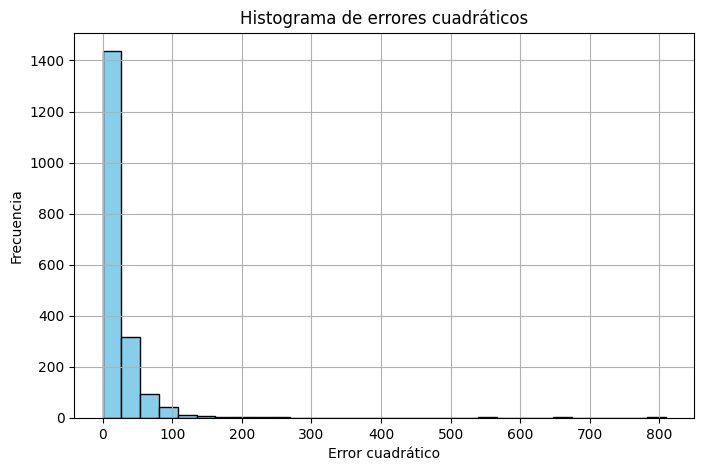

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(errores_cuadrados, bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('Histograma de errores cuadráticos')
plt.xlabel('Error cuadrático')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Veamos cuál es la ecuación del modelo lineal

In [24]:
coeficientes = pd.Series(modelo.coef_, index = X.columns)
intercepto = modelo.intercept_

print("Ecuación del modelo:")
print(f"EP = {intercepto:.2f} + " + " + ".join([f"{coef:.2f}*{var}" for var, coef in coeficientes.items()]))

Ecuación del modelo:
EP = 454.57 + -1.99*AT + -0.23*V + 0.06*AP + -0.16*RH


# 8. Problema completo de clasificación binaria
**Descripción del conjunto de datos**

El baseball es uno de los deportes donde más estadísticas se recogen.

El objetivo de esta tarea es predecir si el número de carreras logradas será superior a un cierto valor.

Para cargar el fichero debes ejecutar el siguiente código

```python
from sklearn.datasets import fetch_openml
dataset = fetch_openml(data_id=41021)
```
La tabla datos se obtiene haciendo

dataset.data
La lista de atributos se obtiene haciendo
```python
dataset.feature_names
```
La columna de valores objetivo (target) se obtiene haciendo
```pyhton
dataset.target
```
Finalmente, se puede leer una descripción del conjunto de datos haciendo
```python
print(dataset.DESCR)
```
Tareas
1. Responder a las siguientes preguntas:

   1. ¿Cuántos ejemplos y cuántos atributos tiene el conjunto de datos?
   2. ¿Cuántos atributos son categóricos?   ¿Cuántos son numéricos discretos?    ¿Cuántos son continuos?
   3. Imprimir una lista de los atributos que son categóricos junto con el número de elementos diferentes en cada uno de ellos
   4. Imprimir una lista de los atributos junto con el número de valores perdidos (NaN).
   5. Eliminar todas las filas que tengan algún atributo perdido.
   6. Crear diccionarios para cada atributo categórico.
2. A partir del conjunto de datos que ha quedado, realizar las tareas de la siguiente lista.
        *¡ IMPORTANTE !*
        La lista de tareas no está ordenada; es posible que haya que hacer unas antes que otras.

        Tampoco se especifican detalles para una tarea si estos son imprescindibles para la misma.

        No conocer estos detalles supone fallos graves.

    * Separar un 20% del conjunto de datos para validar el modelo.
    * Crear una nueva característica que sea el cociente W/RA.
    * Filtrar (eliminar) aquellas características que tengan una varianza σ < 0.02.
    * Obtener una representación diferente mediante PCA con una varianza explicada acumulada mayor o igual al 85%.
    * Aprender un modelo de regresión logística que estime la probabilidad de que la variable target RS > 800.
    * Imprimir métricas de resultados derivadas de la matriz de confusión.

## Primera parte

Veamos cómo abordar el problema, primero viendo cuántos ejemplos y cuántos atributos tenemos

In [53]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

# Cargamos dataset
dataset = fetch_openml(data_id=41021, as_frame=True)
data = dataset.data
target = dataset.target

print(f"Número de ejemplos: {data.shape[0]}")
print(f"Número de atributos: {data.shape[1]}")

Número de ejemplos: 1232
Número de atributos: 14


Luego , toca entender qué atributos son categóricos, númericos (discretos o continuos)

In [54]:
categorical = data.select_dtypes(include=['category', 'object']).columns
numerical = data.select_dtypes(include=['number']).columns

print(f"Atributos categóricos: {len(categorical)}")
print(f"Atributos numéricos: {len(numerical)}")

Atributos categóricos: 6
Atributos numéricos: 8


Para diferenciar discretos de continuos en los numéricos:

In [55]:
discretos = [col for col in numerical if pd.api.types.is_integer_dtype(data[col])]
continuos = [col for col in numerical if pd.api.types.is_float_dtype(data[col])]

print(f"Numéricos discretos: {len(discretos)}")
print(f"Numéricos continuos: {len(continuos)}")

Numéricos discretos: 3
Numéricos continuos: 5


Ahora hacemos una lista de atributos categóricos y sus valores únicos

In [56]:
for col in categorical:
    print(f"{col}: {data[col].nunique()} valores distintos")

Team: 39 valores distintos
League: 2 valores distintos
Playoffs: 2 valores distintos
RankSeason: 8 valores distintos
RankPlayoffs: 5 valores distintos
G: 8 valores distintos


Y aquí tenemos una lista de atributos con valores perdidos

In [57]:
print(data.isnull().sum())

Team              0
League            0
Year              0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64


Visto esto, limpiemos las filas con valores perdidos

In [58]:
data_clean = data.dropna().copy() # Creamos una copia para que sea más segura por si acaso
target_clean = target[data_clean.index]

Podemos crear diccionarios para estos atributos categóricos

In [59]:
categorical_dicts = {col: {val: idx for idx, val in enumerate(data_clean[col].unique())} for col in categorical}

# Aplicamos el diccionario a los datos
for col, mapping in categorical_dicts.items():
    data_clean[col] = data_clean[col].map(mapping)

## Segunda parte

Ahora, toca separar un 20% para validación

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_clean, target_clean.astype(int) > 800, test_size=0.2, random_state=42)

Creamos una nueva característica W/RA

In [61]:
X_train["W/RA"] = X_train["W"] / X_train["RA"]
X_test["W/RA"] = X_test["W"] / X_test["RA"]

Filtramos características con una varianza menor a 0.02

In [62]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.02)
X_train = pd.DataFrame(selector.fit_transform(X_train), columns=X_train.columns[selector.get_support()])
X_test = X_test[X_train.columns]  # Mantener las mismas columnas

Toca hacer la reducción de PCA (>= 95% varianza explicada)

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.85)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Ahora entrenamos el modelo de regresión logística

In [65]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000)

Y finalmente, mostramos las métricas derivadas de la matriz de confusión

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(X_test_pca)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  4]
 [ 3 10]]
              precision    recall  f1-score   support

       False       0.67      0.60      0.63        10
        True       0.71      0.77      0.74        13

    accuracy                           0.70        23
   macro avg       0.69      0.68      0.69        23
weighted avg       0.69      0.70      0.69        23



# 9. Regularización
Dado el siguiente contorno de la función de pérdida

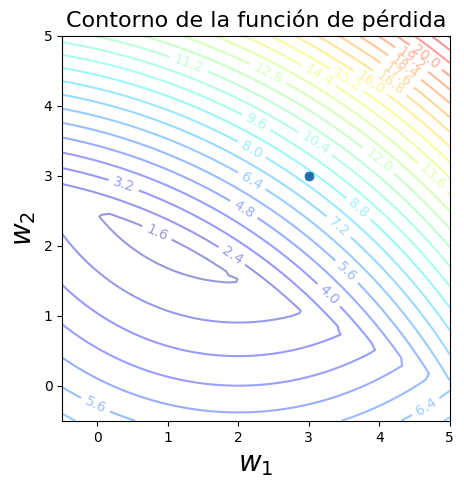


donde el punto azul representa el vector de parámetros inicial, y suponiendo que w0 = 0, se pide:
1. ¿Cuál es el modelo lineal si hacemos descenso de gradiente?
2. ¿En caso de haber un término de regularización, cuál sería? ¿Por qué?
3. ¿Cuál es la estimación del modelo aprendido para el ejemplo (1,1)?

Pesos aprendidos: [0.97606689 1.99295625]
Predicción para el punto (1,1): 2.9690231323585943


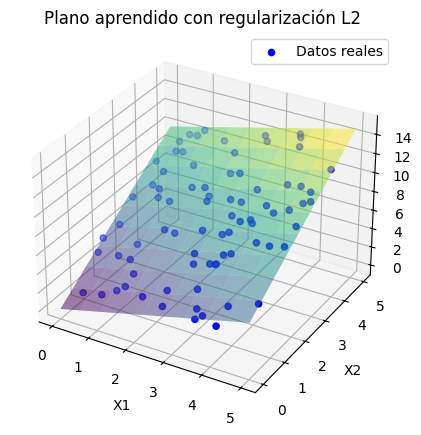

In [67]:
# 1. Crear datos sintéticos
np.random.seed(0)
X = np.random.rand(100, 2) * 5  # 100 ejemplos con 2 características
true_weights = np.array([1, 2])
y = X @ true_weights + np.random.randn(100) * 0.5  # y = x1 + 2x2 + ruido

# 2. División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 3. Opcional: uso de PolynomialFeatures (aunque no lo necesitamos realmente aquí)
poly = PolynomialFeatures(degree=1, include_bias=False)  # no cambia nada en grado 1
X_train_poly = poly.fit_transform(X_train)

# 4. Opcional: eliminación de características con baja varianza
selector = VarianceThreshold(threshold=0.01)
X_train_sel = selector.fit_transform(X_train_poly)

# 5. Descenso de gradiente con regularización L2
def gradient_descent(X, y, lr=0.01, n_iter=1000, lambda_=0.1):
    m, n = X.shape
    w = np.zeros(n)
    for _ in range(n_iter):
        gradient = -2/m * X.T @ (y - X @ w) + 2 * lambda_ * w
        w -= lr * gradient
    return w

# 6. Ejecutar descenso de gradiente
weights = gradient_descent(X_train_sel, y_train, lr=0.01, n_iter=1000, lambda_=0.1)

# 7. Predicción para el punto (1,1)
x_example = np.array([[1, 1]])
x_example_poly = poly.transform(x_example)
x_example_sel = selector.transform(x_example_poly)
prediction = x_example_sel @ weights

# 8. Mostrar resultados
print("Pesos aprendidos:", weights)
print("Predicción para el punto (1,1):", prediction[0])

# 9. Visualizar los datos y el plano aproximado
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, c='blue', label='Datos reales')
X1, X2 = np.meshgrid(np.linspace(0, 5, 10), np.linspace(0, 5, 10))
Z = weights[0] * X1 + weights[1] * X2
ax.plot_surface(X1, X2, Z, alpha=0.5, cmap='viridis')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("Plano aprendido con regularización L2")
plt.legend()
plt.show()